In [25]:
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.models import model_from_json
from sklearn.model_selection import train_test_split

from keras import optimizers, losses, metrics

import matplotlib.pyplot as plt

import pandas as pd

In [2]:
data = pd.read_csv("communities.data", header=-1)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


#### Remove all columns with missing values

In [3]:
print(data.shape)
data.replace({"?": np.nan}, inplace=True)
data.dropna(axis=1, inplace=True)
data.shape

(1994, 128)


(1994, 103)

In [4]:
data.head(5)

,0,3,4,5,6,7,8,9,10,11,...,96,97,98,99,100,118,119,120,125,127
0,8,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,53,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,24,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,34,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,42,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03


In [5]:
np.unique(data[3]).shape

(1828,)

Deleting column 3 "community name" because there are 1828 community names and making them categorical would not make sense, Deleting column 2 "state", we could have used this information as regions by classifying them as North, South, East and West provided we had the state names.

In [6]:
data = data.drop(columns=[0,3])
data.head(5)

,4,5,6,7,8,9,10,11,12,13,...,96,97,98,99,100,118,119,120,125,127
0,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03


#### Coverting data into tensors

In [7]:
dataX = data.to_numpy()[:,:-1]
dataY = data.to_numpy()[:,-1]
print(dataX.shape)
print(dataY.shape)

(1994, 100)
(1994,)


#### Normalizing  Input features

In [8]:
def normalizeData(data, test):
    mean = data.mean(axis=0)
    std = data.std(axis=0)
    data -= mean
    data /= std
    test -= mean
    test /= std
    return data, test

In [9]:
dataX_norm, _ = normalizeData(dataX, dataX)
pd.DataFrame(dataX_norm).head(5)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-2.456761,7.771640,-7.810520,-3.195341,-0.631772,-1.508293,-0.138779,-6.232457,-4.599484,-3.689632,...,-2.48778,-2.722300,-7.507317,-4.017342,-6.021704,-3.581290,3.977438,-0.488346,0.024590,3.522512
1,-2.456761,-4.031792,-14.156237,-1.637724,-3.319702,6.059141,-1.989766,-9.555595,1.225718,-1.524338,...,-2.48778,-1.036787,-5.590195,-8.884700,-3.782266,-6.636907,-4.373085,-3.884293,4.791962,-2.020656
2,-2.456761,-4.031792,-4.451024,4.125456,-6.343623,-0.361712,-2.545062,-4.155497,-4.599484,-4.050515,...,-2.48778,-2.347742,-5.829835,-2.800502,-2.040482,-5.618368,-5.208138,-1.701184,-3.407918,-2.020656
3,-2.456761,-1.546859,8.613686,12.069299,-14.407414,-1.508293,-1.434470,0.829210,-3.143184,-1.885221,...,-2.48778,-1.411346,-10.383000,2.979486,-2.786961,-3.326655,-4.373085,2.665034,1.550149,-2.020656
4,-2.456761,-3.410558,0.401583,-3.195341,0.208206,-2.196241,-2.359963,-4.570889,-8.968386,-5.854926,...,-2.48778,-2.909579,-0.318109,0.241597,-3.533440,-6.382272,-2.702981,-4.611996,-3.407918,-2.020656


#### Function to load spam data

In [10]:
def load_crime_data():
    data = pd.read_csv("communities.data", header=-1)
    data.replace({"?": np.nan}, inplace=True)
    data.dropna(axis=1, inplace=True)
    data = data.drop(columns=[0,3])
    dataX = data.to_numpy()[:,:-1]
    dataY = data.to_numpy()[:,-1]
    dataY = np.reshape(dataY, (dataY.shape[0], 1))
    return train_test_split(dataX, dataY, test_size=0.3, random_state=42)
    

In [11]:
train_X, test_X, train_Y, test_Y = load_crime_data()

In [12]:
train_X, test_X = normalizeData(train_X, test_X)

In [13]:
def buildmodel(inputDim, outputDim):
    nlayers = 2
    nnodes = [64]

    model = Sequential()
    model.add(Dense(nnodes[0], input_dim=inputDim, activation='relu'))

    for i in range(1, nlayers):  #Adding hidden layers
        model.add(Dense(nnodes[i-1], activation='relu'))

    model.add(Dense(outputDim)) # Adding output layer
    model.compile(loss=losses.mse,
              optimizer=optimizers.RMSprop(lr=0.001),
              metrics=[metrics.mae])
    return model

#### Run this to load model from json file

In [26]:
json_file = open('task3model.json', 'r')
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)

model.load_weights("task3weights.h5")
print("Loaded model from disk")

model.compile(loss=losses.mse,
              optimizer=optimizers.RMSprop(lr=0.001),
              metrics=[metrics.mae])

Loaded model from disk


In [14]:
k = 4
numValSamples = int(len(train_X)/k)
num_epochs=20
total_val_mae=[]
total_mae=[]
total_val_mse=[]
total_mse=[]

for i in range(0,k):
    print("Processing fold No " + str(i))
    val_X = train_X[i*numValSamples : (i+1)*numValSamples]
    val_Y = train_Y[i*numValSamples : (i+1)*numValSamples]
    
    #Getting training folds
    remTrainX = np.concatenate([train_X[:i*numValSamples], train_X[(i+1)*numValSamples:]], axis=0)
    remTrainY = np.concatenate([train_Y[:i*numValSamples], train_Y[(i+1)*numValSamples:]], axis=0)
    
    model = buildmodel(train_X.shape[1], 1)
    res = model.fit(remTrainX, remTrainY, epochs=num_epochs, batch_size=1, verbose=0, validation_data=(val_X, val_Y))
    val_mae = res.history['val_mean_absolute_error']
    val_mse = res.history['val_loss']
    mae = res.history['mean_absolute_error']
    mse = res.history['loss']
    total_mse.append(mse)
    total_mae.append(mae)
    total_val_mse.append(val_mse)
    total_val_mae.append(val_mae)

Processing fold No 0

Processing fold No 1
Processing fold No 2
Processing fold No 3


In [15]:
average_train_mae = [np.mean([x[i] for x in total_mae]) for i in range(0,num_epochs)]
average_train_mse = [np.mean([x[i] for x in total_mse]) for i in range(0,num_epochs)]
average_val_mae = [np.mean([x[i] for x in total_val_mae]) for i in range(0,num_epochs)]
average_val_mse = [np.mean([x[i] for x in total_val_mse]) for i in range(0,num_epochs)]
epochs = range(1, len(average_train_mae)+1)

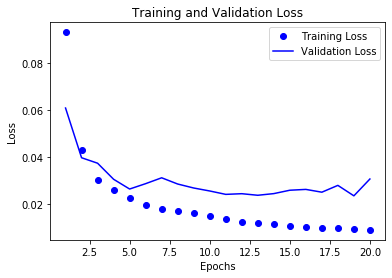

In [16]:
plt.plot(epochs, average_train_mse, 'bo', label='Training Loss')
plt.plot(epochs, average_val_mse, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

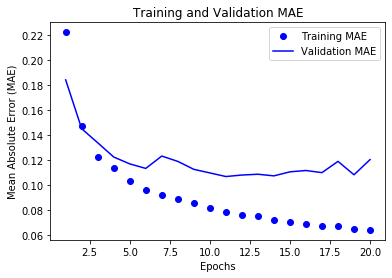

In [17]:
plt.plot(epochs, average_train_mae, 'bo', label='Training MAE')
plt.plot(epochs, average_val_mae, 'b', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.show()

#### Retraining the model on entire training set

In [18]:
model = buildmodel(train_X.shape[1], 1)
model.fit(train_X, train_Y, epochs=num_epochs, batch_size=1, verbose=0)

In [23]:
# serialize model to JSON
model_json = model.to_json()
with open("task3model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("task3weights.h5")
print("Saved task 3 model to disk")

Saved task 3 model to disk


In [27]:
result = model.evaluate(test_X, test_Y)
print(result)

599/599 [==============================] - 0s 144us/step
[0.024621644363628205, 0.1132727786898613]


In [28]:
print("True crime rate: "+str(test_Y[6]))
prediction = model.predict(np.array([test_X[6]]))
print("Predicted crime rate: "+ str(prediction))

True crime rate: [0.23]
Predicted crime rate: [[0.22013119]]
